<a href="https://colab.research.google.com/github/SeoyoungOhMe/BiometricsSecurity/blob/main/03_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[[170.  70.]
 [150.  45.]
 [160.  55.]
 [170.  60.]
 [178.  80.]]


<Axes: xlabel='weight', ylabel='height'>

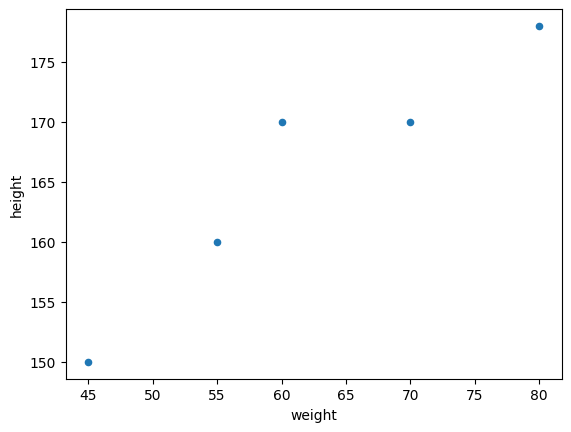

In [4]:
np_data = np.array([
    [170, 70],
    [150, 45],
    [160, 55],
    [170, 60],
    [178, 80],
], dtype=float)

print(np_data)

df = pd.DataFrame(np_data, columns=['height', 'weight'])
df.plot.scatter(x='weight', y='height')

In [9]:
print(np_data.shape) # 5명, feature: 2개 --> (5, 2)

mean_height = np_data[:, 0].mean()
mean_weight = np_data[:, 1].mean()
print(mean_height, mean_weight)

print(np_data.mean(axis=0))
print(np_data.mean(axis=1))

(5, 2)
165.6 62.0
[165.6  62. ]
[120.   97.5 107.5 115.  129. ]


,height,weight
0,4.4,8.0
1,-15.6,-17.0
2,-5.6,-7.0
3,4.4,-2.0
4,12.4,18.0


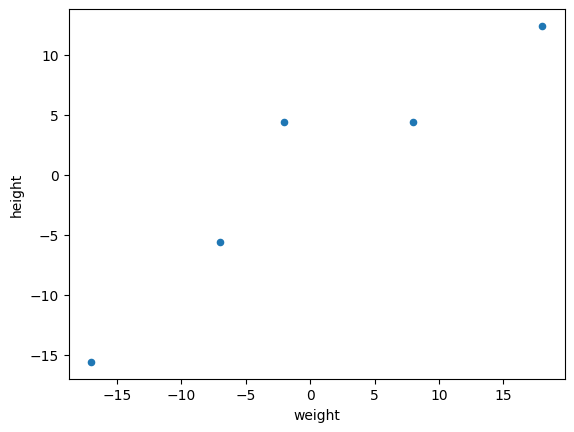

In [13]:
X = np_data - np_data.mean(axis=0)
X

df = pd.DataFrame(X, columns=['height', 'weight'])
df.plot.scatter(x='weight', y='height')
df

In [17]:
# covariance matrix

# X = (5, 2)
# (2, 5) x (5, 2)

cov = X.T @ X
cov /= len(X) # cov = cov / len(X)
cov # (2, 2)

print(np.sqrt(cov))

[[ 9.66643678 10.52615789]
 [10.52615789 12.08304597]]


In [20]:
# eigen value
# Ax = 𝜇x # 𝜇 : lambda, scala
# (Ax - 𝜇x) = 0
# (Ax - 𝜇Ix) = 0
# (A - 𝜇I)x = 0
# det(A - 𝜇I) = 0
# ## A = [[a b] [c d]]
# ## det(A) = ad - bc
# = 𝜇^2 - (a+d)𝜇 + ad - bc = 0
# = 𝜇^2 - (a+d)𝜇 + det(A) = 0

# A = cov
print(cov.diagonal().sum()) # (a+d)
print(np.linalg.det(cov))

# = 𝜇^2 - 239.44*𝜇 + 1365.6

239.44
1365.6000000000015


In [22]:
# e_value_1 = (239.44 + np.sqrt(239.44^2 - 4*1365.6)) / 2
# e_value_2 = (239.44 - np.sqrt(239.44^2 - 4*1365.6)) / 2

e1 = (cov.diagonal().sum() + np.sqrt(cov.diagonal().sum()**2 - 4*np.linalg.det(cov))) / 2
e2 = (cov.diagonal().sum() - np.sqrt(cov.diagonal().sum()**2 - 4*np.linalg.det(cov))) / 2

print(e1, e2)

233.59395839260176 5.846041607398234


In [23]:
print(e1 / sum([e1, e2]))
print(e2 / sum([e1, e2]))

0.9755845238581764
0.024415476141823565


In [24]:
# (A - 𝜇I)x = 0 # 𝜇1 = 233.593..., 𝜇2 = 5.846...
# (cov - 𝜇1*I)x = 0
# (cov - 𝜇1*I)x @ eigenvector1 = 0
# (cov - 𝜇2*I)x @ eigenvector2 = 0

In [25]:
cov

array([[ 93.44, 110.8 ],
       [110.8 , 146.  ]])

In [30]:
# cov = [[93.44 110.8] [110.8 146.]]
# (cov - 233.59I) x = 0
# [93.44-233.59 110.8] @ [x1 x2] = 0
# (93.44-233.59)*x1 + 110.8*x2 = 0
# a*x2 + b*x2 = 0
# x1 = -b
# x2 = a
# a*(-b) + b*(a) = 0

# print(e1)
# print(np.eye(2))
# print(e1*np.eye(2))

cov_eig = cov - e1 * np.eye(2)
cov_eig

ev1 = np.array([cov_eig[0][1], cov_eig[0][0]])
print(ev1)

print(cov_eig @ ev1) # 0 vector

[ 110.8        -140.15395839]
[-31058.1171798  24553.28     ]


In [31]:
cov_e2 = cov - e2 * np.eye(2)

ev2 = np.array([-cov_e2[0][1], cov_e2[0][0]])
ev2

array([-110.8       ,   87.59395839])

In [32]:
print(ev1, ev2)

[ 110.8        -140.15395839] [-110.8          87.59395839]


In [33]:
ev1_norm = ev1 / np.linalg.norm(ev1)
print(ev1_norm)
print(np.linalg.norm(ev1_norm))

[ 0.62016874 -0.78446844]
1.0


In [35]:
print(np.linalg.norm(ev2))
ev2_norm = ev2 / np.linalg.norm(ev2)
print(ev2_norm)
print(np.linalg.norm(ev2_norm))

141.24213800026126
[-0.78446844  0.62016874]
1.0


In [40]:
# SVD

e_value, e_vector = np.linalg.eig(cov) # SVD
e_vector = e_vector.T
print(e_value)
print(e_vector)

[  5.84604161 233.59395839]
[[-0.78446844  0.62016874]
 [-0.62016874 -0.78446844]]


In [41]:
print(e1, e2)
print(ev1_norm, ev2_norm)

233.59395839260176 5.846041607398234
[ 0.62016874 -0.78446844] [-0.78446844  0.62016874]


In [42]:
e_vector[0].T @ e_vector[1]

0.0

[183.2470886970884, -183.2470886970884] [144.8676702427632, -144.8676702427632]
[-3.6255322425019676, 3.6255322425019676] [4.586035154031201, -4.586035154031201]


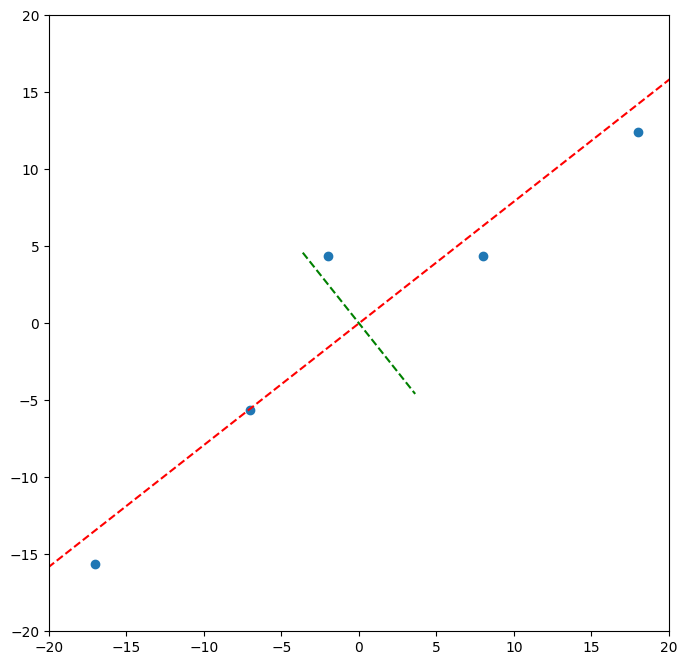

In [49]:
plt.figure(figsize=(8, 8))
plt.xlim((-20, 20))
plt.ylim((-20, 20))

# eigen vector 1
x = [-e_value[1]*e_vector[1][1], e_value[1]*e_vector[1][1]] # (weight1, weight2)
y = [-e_value[1]*e_vector[1][0], e_value[1]*e_vector[1][0]] # (height1, height2)
print(x, y)
plt.plot(x, y, 'r--')

# eigen vector 2
x = [-e_value[0]*e_vector[0][1], e_value[0]*e_vector[0][1]] # (weight1, weight2)
y = [-e_value[0]*e_vector[0][0], e_value[0]*e_vector[0][0]] # (height1, height2)
print(x, y)
plt.plot(x, y, 'g--')

plt.scatter(df['weight'], df['height'])

In [52]:
list(X @ -e_vector[1].T)

[9.004489983896276,
 -23.010595824587238,
 -8.96422402637538,
 1.1598055597766808,
 21.810524307289683]

In [53]:
X

array([[  4.4,   8. ],
       [-15.6, -17. ],
       [ -5.6,  -7. ],
       [  4.4,  -2. ],
       [ 12.4,  18. ]])